## Анализ приложения для определения номера телефона

**Цель:** Выявить, является ли первая когорта более активной чем вторая (первая когорта - установили приложение и включили опцию "определитель номера", вторая когорта - установили приложение и не включили опцию "определитель номера"). Определить количество пользователей, lifetime которых составляет 180 дней.

От заказчика было предоставлено три датафрейма:
1. `events.csv` имеет два столбца: **id** - уникальный номер пользователя, **event_day** - дата посищения приложения.
2. `on_res.csv` данные о пользователях, которые включили опцию "определитель номера"
3. `off_res.csv` данные о пользователях, которые НЕ включили опцию "определитель номера"

В последних двух датафреймах одинаковые столбцы:
- `id` идентификатор событий
-  `event_date` количество дней от "компьютерного времени"
- `sessions` количество сессий
- `searches` количество поисков
- `clicks` количество кликов
- `voice_sessions` голосовые поиски

В каждой строке находится суммарное значение за месяц.

### Общая информация и предобработка

In [1]:
#импортируем необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#загружаем датафреймы и сохраняем их в переменные

events = pd.read_csv('events.csv')
off = pd.read_csv('off_res.csv')
on = pd.read_csv('on_res.csv')

In [3]:
#создадим функцию для ознакомления с датафреймом

def pre_processing(data):
    
    #выведем первые пять строк фрейма
    head_info = display(data.head())
    print('-'*50)
    
    #выведем общую информацию о фрейме
    inform = data.info()
    print('-'*50)
    
    #проверим наличие явных дубликатов
    dub_count = data.duplicated().sum()
    print('Количество дубликатов равно', dub_count)

In [4]:
pre_processing(events)

,id,event_date
0,0,2020-02-18
1,0,2020-02-25
2,0,2020-03-03
3,0,2020-03-10
4,0,2020-03-17


--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18287 entries, 0 to 18286
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          18287 non-null  int64 
 1   event_date  18287 non-null  object
dtypes: int64(1), object(1)
memory usage: 285.9+ KB
--------------------------------------------------
Количество дубликатов равно 0


In [5]:
pre_processing(off)

,id,event_date,sessions,searches,clicks,voice_sessions
0,000bbd081e131998bf9466de5189ef96,18383,0.0,0.0,0.0,0.0
1,0012fe8add1377390b64ff7140333d7e,18383,73.0,64.0,1.0,0.0
2,002b8b25a1042db3681f74bf4bde8752,18383,3.0,2.0,0.0,1.0
3,00807e318f397b8a42649976ec8ac703,18383,0.0,0.0,0.0,0.0
4,0094d0c5d1b9fe3e9441d7340faaa6da,18383,1.0,0.0,0.0,0.0


--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47009 entries, 0 to 47008
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              47009 non-null  object 
 1   event_date      47009 non-null  int64  
 2   sessions        47009 non-null  float64
 3   searches        47009 non-null  float64
 4   clicks          47009 non-null  float64
 5   voice_sessions  47009 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.2+ MB
--------------------------------------------------
Количество дубликатов равно 0


In [6]:
pre_processing(on)

,id,event_date,sessions,searches,clicks,voice_sessions
0,000bfce06ef595198664ab8585971fe7,18383,0.0,0.0,0.0,0.0
1,00121ef9b931b98aa984be5efd7ed320,18383,3.0,2.0,0.0,2.0
2,00127e3471b0aadabf64a35bdd0ff1c3,18383,9.0,6.0,0.0,3.0
3,0015d730345e160b3924f3b260b181f5,18383,8.0,2.0,1.0,0.0
4,00a34ccb73606e0b0f94aa6852f5f017,18383,4.0,0.0,1.0,1.0


--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47009 entries, 0 to 47008
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              47009 non-null  object 
 1   event_date      47009 non-null  int64  
 2   sessions        47009 non-null  float64
 3   searches        47009 non-null  float64
 4   clicks          47009 non-null  float64
 5   voice_sessions  47009 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.2+ MB
--------------------------------------------------
Количество дубликатов равно 0


_В данных нет пропусков. Размер первой когорты и второй совпадает._

In [7]:
#приведём столбец 'event_date' к типу данных datetime

events['event_date'] = pd.to_datetime(events['event_date'])

### Исследовательский анализ

In [8]:
#найдём среднюю длительность по голосовым сессиям

on['voice_sessions'].mean()

0.979918738964879

In [9]:
off['voice_sessions'].mean()

0.9161862622051097

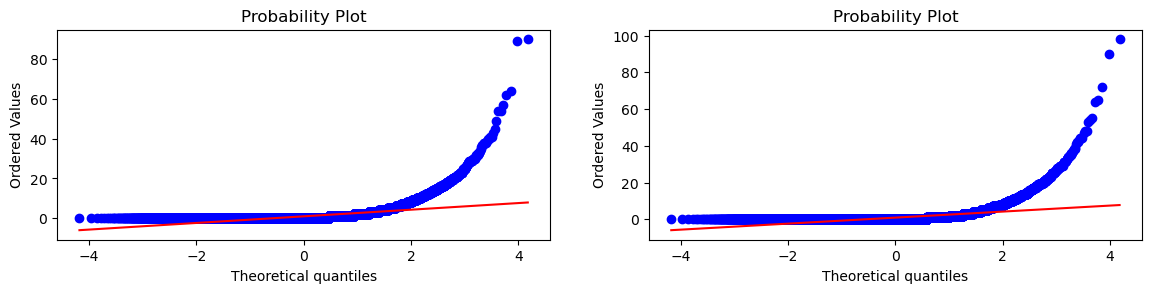

In [10]:
#проверим расспределение данных на нормальность

plt.figure(figsize=(14, 6))
plt.subplot(2,2,1)
stats.probplot(on['voice_sessions'], dist='norm', plot=plt)
plt.subplot(2,2,2)
stats.probplot(off['voice_sessions'], dist='norm', plot=plt)
plt.show()

_Из графиков видно, что данные расспределены не совсем нормально._ 

In [11]:
#проведем ttest и тест манна-уитни и проверим гипотезы: нулевая - различий между группами нет, альтернативная - различия есть
alpha = 0.05

for column in ['sessions', 'searches', 'clicks', 'voice_sessions']:
    print(column)
    print('ttest')
    print(on[column].mean(), 'vs', off[column].mean())
    stat, pvalue = stats.ttest_ind(on[column], off[column])
    print('Отвергаем нулевую гипотезу' if alpha > pvalue/2 else 'Принимаем нулевую гипотезу', 'pvalue=', pvalue)
    print()

    print('MWtest')
    stat, pvalue = stats.mannwhitneyu(on[column], off[column], alternative='two-sided')
    print('Отвергаем нулевую гипотезу' if alpha > pvalue/2 else 'Принимаем нулевую гипотезу', 'pvalue=', pvalue)
    print()

sessions
ttest
27.36248377970176 vs 18.648811929630497
Отвергаем нулевую гипотезу pvalue= 2.9147747745730807e-291

MWtest
Отвергаем нулевую гипотезу pvalue= 0.0

searches
ttest
10.636622774362356 vs 9.447552596311345
Отвергаем нулевую гипотезу pvalue= 3.4199028562551756e-19

MWtest
Отвергаем нулевую гипотезу pvalue= 6.502527032040216e-39

clicks
ttest
7.525920568401795 vs 5.460507562381672
Отвергаем нулевую гипотезу pvalue= 7.138629145106243e-57

MWtest
Отвергаем нулевую гипотезу pvalue= 0.0

voice_sessions
ttest
0.979918738964879 vs 0.9161862622051097
Отвергаем нулевую гипотезу pvalue= 0.000271663434926768

MWtest
Отвергаем нулевую гипотезу pvalue= 7.591985494166653e-40



_Между двумя выборками есть различия, но значение p-value показывает, что в данных есть аномалии. По этому нам необходимо привести данные к нормальному распределению._

In [12]:
#исспользуем функцию hash и установим количество корзин 100

on['backet'] = on['id'].apply(lambda x: hash(x) % 100)
off['backet'] = off['id'].apply(lambda x: hash(x) % 100)

In [13]:
#проверим вывод 
on.head()

,id,event_date,sessions,searches,clicks,voice_sessions,backet
0,000bfce06ef595198664ab8585971fe7,18383,0.0,0.0,0.0,0.0,36
1,00121ef9b931b98aa984be5efd7ed320,18383,3.0,2.0,0.0,2.0,59
2,00127e3471b0aadabf64a35bdd0ff1c3,18383,9.0,6.0,0.0,3.0,44
3,0015d730345e160b3924f3b260b181f5,18383,8.0,2.0,1.0,0.0,28
4,00a34ccb73606e0b0f94aa6852f5f017,18383,4.0,0.0,1.0,1.0,63


In [14]:
#проверим вывод 
off.head()

,id,event_date,sessions,searches,clicks,voice_sessions,backet
0,000bbd081e131998bf9466de5189ef96,18383,0.0,0.0,0.0,0.0,71
1,0012fe8add1377390b64ff7140333d7e,18383,73.0,64.0,1.0,0.0,35
2,002b8b25a1042db3681f74bf4bde8752,18383,3.0,2.0,0.0,1.0,25
3,00807e318f397b8a42649976ec8ac703,18383,0.0,0.0,0.0,0.0,51
4,0094d0c5d1b9fe3e9441d7340faaa6da,18383,1.0,0.0,0.0,0.0,69


In [15]:
#проверим какое количество уникальных пользователей входит в корзину
on.groupby('backet')['id'].nunique()

backet
0     500
1     461
2     434
3     455
4     484
     ... 
95    454
96    430
97    456
98    478
99    494
Name: id, Length: 100, dtype: int64

In [16]:
#сгруппируем данные по столбцу backet и построим график 

backet_on = on.groupby('backet')[['sessions', 'searches', 'clicks', 'voice_sessions']].sum()
backet_off = off.groupby('backet')[['sessions', 'searches', 'clicks', 'voice_sessions']].sum()

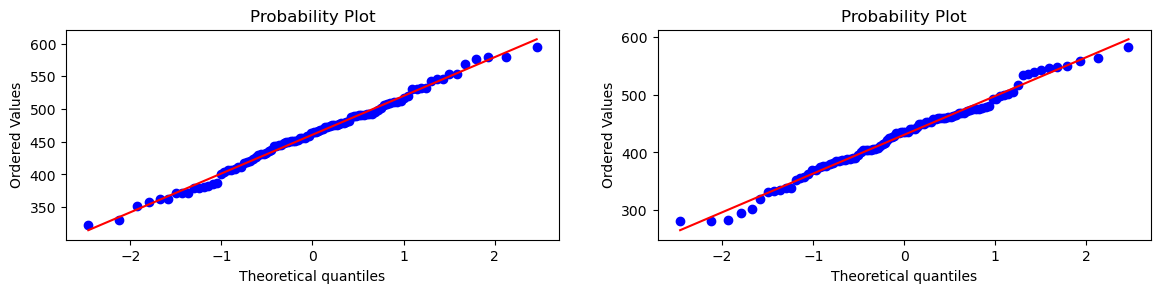

In [17]:
plt.figure(figsize=(14, 6))
plt.subplot(2,2,1)
stats.probplot(backet_on['voice_sessions'], dist='norm', plot=plt)
plt.subplot(2,2,2)
stats.probplot(backet_off['voice_sessions'], dist='norm', plot=plt)
plt.show()

_Теперь видно, что данные расспределены нормально._

In [18]:
alpha = 0.05

for column in ['sessions', 'searches', 'clicks', 'voice_sessions']:
    print(column)
    print('ttest')
    print(backet_on[column].mean(), 'vs', backet_off[column].mean())
    stat, pvalue = stats.ttest_ind(backet_on[column], backet_off[column])
    print('Отвергаем нулевую гипотезу' if alpha > pvalue/2 else 'Принимаем нулевую гипотезу', 'pvalue=', pvalue)
    print()

    print('MWtest')
    stat, pvalue = stats.mannwhitneyu(backet_on[column], backet_off[column], alternative='two-sided')
    print('Отвергаем нулевую гипотезу' if alpha > pvalue/2 else 'Принимаем нулевую гипотезу', 'pvalue=', pvalue)
    print()

sessions
ttest
12862.83 vs 8766.62
Отвергаем нулевую гипотезу pvalue= 8.12437068273863e-74

MWtest
Отвергаем нулевую гипотезу pvalue= 6.017138123817569e-34

searches
ttest
5000.17 vs 4441.2
Отвергаем нулевую гипотезу pvalue= 2.6947056924627277e-12

MWtest
Отвергаем нулевую гипотезу pvalue= 7.903428735814525e-12

clicks
ttest
3537.86 vs 2566.93
Отвергаем нулевую гипотезу pvalue= 1.417006613720683e-36

MWtest
Отвергаем нулевую гипотезу pvalue= 9.313927154797892e-27

voice_sessions
ttest
460.65 vs 430.69
Отвергаем нулевую гипотезу pvalue= 0.0008525528770503301

MWtest
Отвергаем нулевую гипотезу pvalue= 0.0012905691385425337



**_После приведения данных к нормальному расспределению, мы отвергаем нулевую гипотезу и делаем вывод, что между двумя когортами есть значимые различия. Первая когорта, которая пользуется опцией "определитель номера" - это более активные пользователи._**

### Рассчет lifetime для пользователей приложения

In [19]:
#группируем таблицу для расчета lifetime

grouped = events.groupby('id')['event_date'].agg(['min', 'max'])

In [20]:
#добавляем столбец с lifetime

grouped['lifetime'] = (grouped['max'] - grouped['min']).dt.days
grouped

,min,max,lifetime
id,,,
0,2020-02-18,2020-05-19,91
1,2020-03-31,2020-12-22,266
2,2020-01-12,2020-02-23,42
3,2020-05-23,2020-09-19,119
4,2020-01-10,2020-07-03,175
...,...,...,...
995,2020-10-17,2020-12-19,63
996,2020-11-07,2020-12-19,42
997,2020-11-02,2020-12-21,49


In [21]:
#узнаем начальную и последнюю дату данных

print(f'Начальная дата данных: {grouped["min"].min()}, последняя дата данных {grouped["max"].max()}')

Начальная дата данных: 2020-01-01 00:00:00, последняя дата данных 2020-12-26 00:00:00


In [22]:
#определяем дату lifetime = 180 дней

start_date = pd.to_datetime('2020-01-01')
half_date = start_date + pd.to_timedelta(180, unit='d')
end_date = start_date + pd.to_timedelta(360, unit='d')

print(start_date, '/' , half_date, '/', end_date)

2020-01-01 00:00:00 / 2020-06-29 00:00:00 / 2020-12-26 00:00:00


In [23]:
#добавляем столбец и проверяем, является ли пользователь активным

grouped['is_lost'] = (grouped['max'] + pd.to_timedelta(7, unit='d')) < end_date
grouped

,min,max,lifetime,is_lost
id,,,,
0,2020-02-18,2020-05-19,91,True
1,2020-03-31,2020-12-22,266,False
2,2020-01-12,2020-02-23,42,True
3,2020-05-23,2020-09-19,119,True
4,2020-01-10,2020-07-03,175,True
...,...,...,...,...
995,2020-10-17,2020-12-19,63,False
996,2020-11-07,2020-12-19,42,False
997,2020-11-02,2020-12-21,49,False


In [24]:
#проверим среднее значение lifetime

grouped['lifetime'].mean()

121.009

_Согласно ТЗ, заказчик хочет видеть количество пользователей с lifetime от 180 дней, по этому мы будем делать прогноз, на основании данных, которые у нас есть. Для этого рассчитаем Retention Rate_

In [25]:
#создадим таблицу, в которую попадут пользователи, которые регистрировались ранее даты half_date

train = grouped[grouped['min'] <= half_date]

In [26]:
#задаем периоды

periods = [30, 60, 90, 120, 150, 180]

In [27]:
#считаем Retention Rate

a = [train.shape[0]] + [train[train['lifetime'] > i].shape[0] for i in periods]
a

[502, 427, 383, 356, 323, 299, 273]

In [28]:
#Retention Rate в %

transf = []
for i in range(len(a)-1):
    transf.append(a[i+1]/a[i])
    
transf

[0.850597609561753,
 0.8969555035128806,
 0.9295039164490861,
 0.9073033707865169,
 0.9256965944272446,
 0.9130434782608695]

In [29]:
#создаем словарь в котором рассчитаем математическое ожидание для каждого периода


a_dict = {i:{} for i in range(30, 181, 30)}
dict_keys = sorted(a_dict.keys())

for i in range(len(transf)):
    tmp = 1
    for j in range(i, len(transf)):
        tmp2 = tmp * transf[j]
        a_dict[dict_keys[i]][dict_keys[j]] = tmp - tmp2
        tmp = tmp2
    a_dict[dict_keys[i]][210] = 1 - sum(a_dict[dict_keys[i]].values())
    
a_dict

{30: {30: 0.149402390438247,
  60: 0.08764940239043828,
  90: 0.05378486055776899,
  120: 0.06573705179282863,
  150: 0.047808764940239,
  180: 0.05179282868525903,
  210: 0.5438247011952191},
 60: {60: 0.10304449648711944,
  90: 0.06323185011709609,
  120: 0.07728337236533955,
  150: 0.05620608899297419,
  180: 0.060889929742388826,
  210: 0.6393442622950819},
 90: {90: 0.07049608355091386,
  120: 0.08616187989556134,
  150: 0.06266318537859006,
  180: 0.06788511749347259,
  210: 0.7127937336814621},
 120: {120: 0.0926966292134831,
  150: 0.0674157303370786,
  180: 0.0730337078651686,
  210: 0.7668539325842697},
 150: {150: 0.07430340557275539,
  180: 0.08049535603715174,
  210: 0.8452012383900929},
 180: {180: 0.08695652173913049, 210: 0.9130434782608695}}

In [30]:
#пишем функцию, которая вернет нам среднее значение для случайной величины

def mean_calc(prob):
    mean = 0
    for item in prob.items():
        mean += item[0] * item[1]
    return mean

In [31]:
#применим функцию и рассчитаем средний lifetime для каждого периода

mean_lt = {}

for key in a_dict:
    mean_lt[key] = mean_calc(a_dict[key])
    
mean_lt

{30: 153.16733067729083,
 60: 174.80093676814988,
 90: 187.98955613577021,
 120: 195.42134831460675,
 150: 203.12693498452012,
 180: 207.3913043478261}

In [32]:
#пишем функцию, которая пройдется по всем строкам и определит ожидаемый lifetime

def predict_lt(row):
    if not row['is_lost']:
        for item in mean_lt.items():
            if row['lifetime'] < item[0]:
                return item[1]
        return row['lifetime']
    else:
        return row['lifetime']

In [33]:
#применяем функцию 

grouped['predicted_lt'] = grouped.apply(predict_lt, axis=1)
grouped

,min,max,lifetime,is_lost,predicted_lt
id,,,,,
0,2020-02-18,2020-05-19,91,True,91.000000
1,2020-03-31,2020-12-22,266,False,266.000000
2,2020-01-12,2020-02-23,42,True,42.000000
3,2020-05-23,2020-09-19,119,True,119.000000
4,2020-01-10,2020-07-03,175,True,175.000000
...,...,...,...,...,...
995,2020-10-17,2020-12-19,63,False,187.989556
996,2020-11-07,2020-12-19,42,False,174.800937
997,2020-11-02,2020-12-21,49,False,174.800937


In [34]:
#проверим средний lifetime

grouped['predicted_lt'].mean()

160.30785576714436

**_Средний прогнозируемый lifetime получился меньше (160 дней), чем запрашивал заказчик (180 дней). Так получилось из-за того, что приложение работает меньше года, по этому будет целесообразно провести повторный анализ через 3-4 месяца_**